In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [67]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']

In [68]:
autompg = pd.read_csv(url, names=column_names,
                          na_values='?', comment='\t',
                          sep=' ', skipinitialspace=True)

In [69]:
autompg.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [70]:
autompg.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')

In [71]:
df = pd.DataFrame(data=autompg, columns=autompg.columns)

In [72]:
df.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [73]:
df.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'Origin'],
      dtype='object')

In [74]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      6
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [75]:
df['Horsepower'] = df['Horsepower'].fillna(df['Horsepower'].mean())

In [76]:
df.isna().sum()

MPG             0
Cylinders       0
Displacement    0
Horsepower      0
Weight          0
Acceleration    0
Model Year      0
Origin          0
dtype: int64

In [77]:
df.shape

(398, 8)

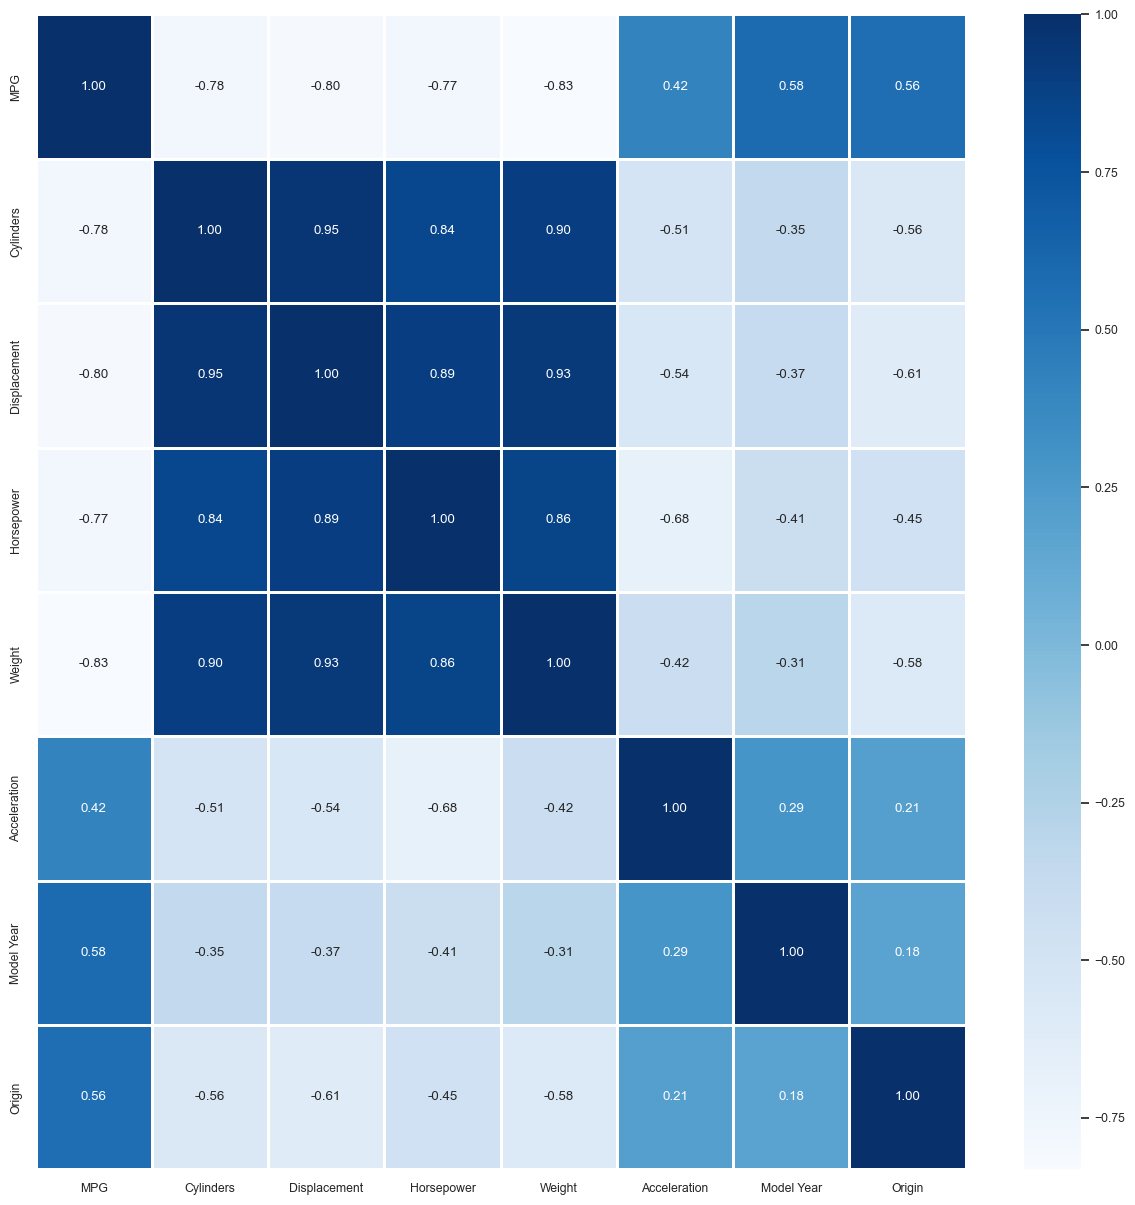

In [78]:
# Heatmap

df_corr=df.corr()
sns.set(font_scale=0.8)
plt.figure(figsize=(15,15))
sns.heatmap(df_corr, cbar=True, linewidths=1.0, annot=True, fmt=".2f", cmap="Blues")
plt.show()

In [80]:
x=df.loc[:, ['Cylinders', 'Displacement', 'Horsepower', 'Weight']]
x.head()

,Cylinders,Displacement,Horsepower,Weight
0,8,307.0,130.0,3504.0
1,8,350.0,165.0,3693.0
2,8,318.0,150.0,3436.0
3,8,304.0,150.0,3433.0
4,8,302.0,140.0,3449.0


In [81]:
y=df2.loc[:, ['MPG']]
y.head()

,MPG
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [82]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.25, random_state=42)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(298, 4) (298, 1)
(100, 4) (100, 1)


In [83]:
# Regression

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

평균제곱근오차 3.8235277580874096


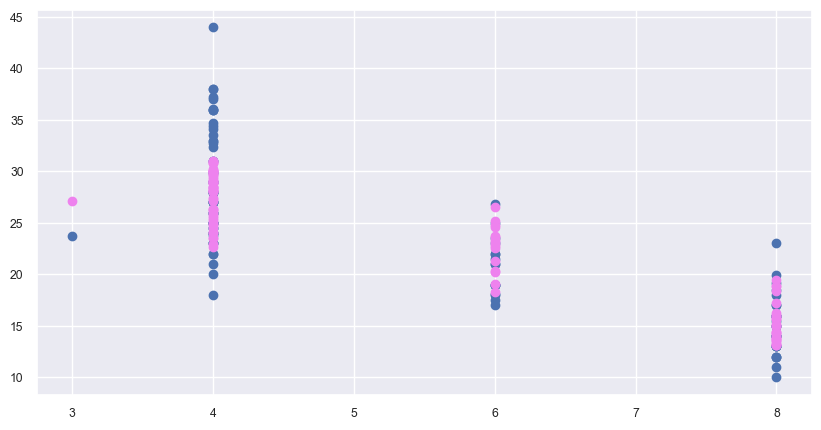

In [84]:
# SVR

model = SVR()
model.fit(X_train, y_train)

sy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(sy_preds, y_test))
print('평균제곱근오차', mse)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Cylinders'], y_test, label='y_test')
plt.scatter(X_test['Cylinders'], sy_preds, c='violet', label='sy_preds')
plt.show()

평균제곱근오차 5.121240084198358


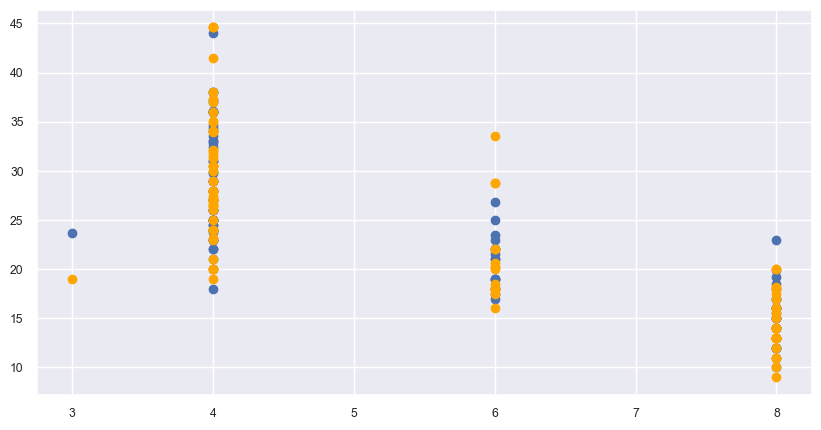

In [85]:
# DT

model = DecisionTreeRegressor()
model.fit(X_train, y_train)

dy_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(dy_preds, y_test))
print('평균제곱근오차', mse)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Cylinders'], y_test, label='y_test')
plt.scatter(X_test['Cylinders'], dy_preds, c='orange', label='dy_preds')
plt.show() 

평균제곱근오차 3.4389106371058835


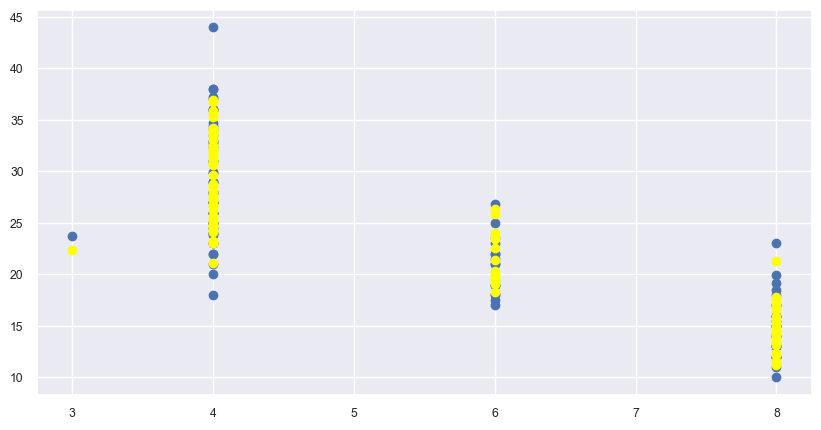

In [86]:
# RF

model = RandomForestRegressor()
model.fit(X_train, y_train)

ry_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ry_preds, y_test))
print('평균제곱근오차', mse)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Cylinders'], y_test, label='y_test')
plt.scatter(X_test['Cylinders'], ry_preds, c='yellow', label='ry_preds')
plt.show() 

평균제곱근오차 3.942095732772199


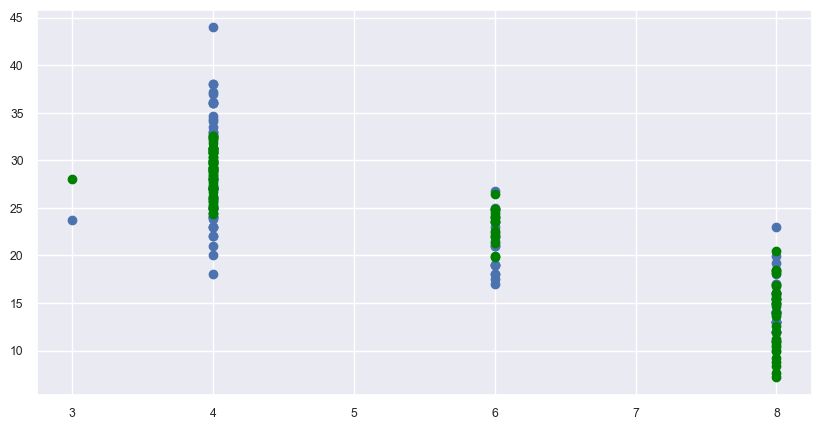

In [87]:
# LR

model = LinearRegression()
model.fit(X_train, y_train)

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

plt.figure(figsize=(10,5))
plt.scatter(X_test['Cylinders'], y_test, label='y_test')
plt.scatter(X_test['Cylinders'], ly_preds, c='green', label='ly_preds')
plt.show()